In [1]:
## 이번 장에 필요한 패키지들을 먼저 불러들임

import pandas as pd
import numpy as np
import os                                   ## chdir 함수 사용위해서
import matplotlib.pyplot as plt             ## 그림 그리기 위해서
from lifelines import CoxPHFitter           ## 콕스 PH 모형을 적합하기 위해
from lifelines import CoxTimeVaryingFitter  ## 시간 의존형 콕스 모형을 적합하기 위해

In [2]:
## 디렉토리 설정
os.chdir("/Users/skang-imacpro/Dropbox/Sangwook/Teaching/YS-Naver/Survival/Data")
pbc = pd.read_csv("pbc_comp.csv")  ## pbc 자료 불러들이기

In [3]:
## 콕스 PH 모형을 적합
## 1. PBC 자료를 이용: treat 효과만을 고려함

cox_trt = CoxPHFitter()  ## 콕스 PH 모형 적합 결과를 cox_trt에 저장하도록 지정

## cox_trt.fit에서 (사용할 자료, 생존시간, 절단 여부, 식)의 형태로 값을 입력
## formula 옵션: 사용할 설명 변수를 +의 형태로 붙여 넣어준다.
cox_trt.fit(pbc, duration_col="futime", event_col="delta", formula="treat")
cox_trt.print_summary(3)  ## 결과 출력. (3)은 소숫점 3째 자리까지

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'futime'
                event col = 'delta'
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -639.915
         time fit was run = 2021-02-27 23:45:59 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
treat     -0.057      0.944      0.179           -0.408            0.294                0.665                1.342

               z     p   -log2(p)
covariate                        
treat     -0.319 0.749      0.416
---
Concordance = 0.499
Partial AIC = 1281.831
log-likelihood ratio test = 0.102 on 1 df
-log2(p) of ll-ratio test = 0.416

In [4]:
## 2. PBC 자료를 이용: age 효과만을 고려함

cox_age = CoxPHFitter()  ## 콕스 PH 모형 적합 결과를 cox_age에 저장하도록 지정

## cox_age.fit에서 (사용할 자료, 생존시간, 절단 여부, 식)의 형태로 값을 입력
cox_age.fit(pbc, duration_col="futime", event_col="delta", formula="age")
cox_age.print_summary(3)  ## 결과 출력. (3)은 소숫점 3째 자리까지

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'futime'
                event col = 'delta'
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -629.714
         time fit was run = 2021-02-27 23:46:03 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        0.040      1.041      0.009            0.023            0.057                1.023                1.059

              z       p   -log2(p)
covariate                         
age       4.539 <0.0005     17.433
---
Concordance = 0.625
Partial AIC = 1261.428
log-likelihood ratio test = 20.505 on 1 df
-log2(p) of ll-ratio test = 17.359

In [5]:
## 3. PBC 자료를 이용: treat, sex, age, edema, bili 효과를고려함

cox_trt2 = CoxPHFitter()  ## 콕스 PH 모형 적합 결과를 cox_trt에 저장하도록 지정

## cox_trt2.fit에서 (사용할 자료, 생존시간, 절단 여부, 식)의 형태로 값을 입력
## formula 옵션: 사용할 설명 변수를 +의 형태로 붙여 넣어준다.
cox_trt2.fit(pbc, duration_col="futime", event_col="delta", 
             formula="treat+sex+age+edema+bili")
cox_trt2.print_summary(3)  ## 결과 출력. (3)은 소숫점 3째 자리까지

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'futime'
                event col = 'delta'
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -573.369
         time fit was run = 2021-02-27 23:46:07 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        0.036      1.036      0.009            0.018            0.054                1.018                1.055
bili       0.129      1.137      0.015            0.100            0.157                1.105                1.170
edema      1.643      5.172      0.296            1.062            2.224                2.893                9.245
sex       -0.538      0.584      0.245           -1.018           -0.057                0.361                0.944
treat     -0.045      0.956      0.188           -0.415            0.324                0.660                1.382

               z       p   -log2(p)
covariate                          
age        3.885 <0.0005     13.253
bili       8.868 <0.0005     60.219
edema      5.545 <0.0005     25.023
sex       -2.194   0.028      5.145
treat     -0.241   0.809      0.305
---
Concordance = 0.801
Partial AIC = 1156.739
log-likelihood ratio test = 133.194 on 5 df
-log2(p) of ll-ratio test = 87.372

In [6]:
# PBC 자료: 층화 콕스 모형 적합

cox_trtstr = CoxPHFitter()  ## 콕스 PH 모형 적합 결과를 cox_trtstr에 저장하도록 지정

## strata: 층화변수인 hepa를 지정
cox_trtstr.fit(pbc, duration_col="futime", event_col="delta", formula="treat", strata=["hepa"])
cox_trtstr.print_summary(3)  ## 결과 출력

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'futime'
                event col = 'delta'
                   strata = ['hepa']
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -547.350
         time fit was run = 2021-02-27 23:46:10 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
treat     -0.121      0.886      0.179           -0.473            0.231                0.623                1.260

               z     p   -log2(p)
covariate                        
treat     -0.674 0.501      0.998
---
Concordance = 0.507
Partial AIC = 1096.700
log-likelihood ratio test = 0.454 on 1 df
-log2(p) of ll-ratio test = 0.999

Text(0.5, 1.0, 'Survival functions: female vs. male')

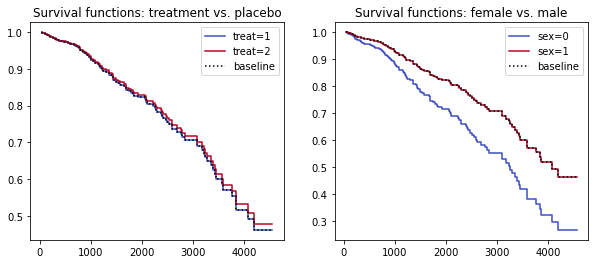

In [7]:
## 한 줄에 두 개의 plot을 그림
## 각 plot의 사이즈는 10 x 4 인치로
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  

## 처리와 위약군의 생존 함수를 비교하는 plot 생성
# Note: cox_trt2 사용. 즉, 5개의 설명 변수 사용하는 모형
## ax[0]: 2개의 subplot중 첫 번째를 의미
cox_trt2.plot_partial_effects_on_outcome(covariates='treat', values=[1, 2], cmap='coolwarm', 
                                        ax=ax[0])
ax[0].set_title("Survival functions: treatment vs. placebo")  ## 첫 번째 plot의 제목

## 남성과 여성의 생존 함수를 비교하는 plot 생성
cox_trt2.plot_partial_effects_on_outcome("sex", values=[0,1], cmap='coolwarm', ax=ax[1])
ax[1].set_title("Survival functions: female vs. male")  ## 두 번째 plot의 제목)

In [8]:
## PBC 자료: 동일한 (tied) 생존 시간 찾기

pbc_fail = pbc.query("delta==1")  ## PBC 자료 중 생존 시간이 관측된 자료
futime_count = pbc_fail['futime'].value_counts()  ## 생존 시간의 빈도 (count) 계산
futime_count[futime_count > 1]  ## 동일한 생존 시간 빈도 출력

1690    2
264     2
1191    2
Name: futime, dtype: int64

In [9]:
pbc.query("futime in [264, 1191, 1690]")  ## 생존 시간이 264, 1191, 1690인 관측치 출력

,id,futime,delta,treat,age,sex,asc,hepa,spider,edema,bili,chol,albumin,copper,phos,sgot,trig,plate,protime,histol
22,23,264,1,2,55.9671,1,1,1,1,1.0,17.4,395.0,2.94,558.0,6064.8,227.04,191.0,214.0,11.7,4
74,75,1191,1,1,43.5181,1,1,1,1,0.5,17.1,674.0,2.53,207.0,2078.0,182.90,598.0,268.0,11.5,4
77,78,1690,1,1,47.9452,1,0,1,0,0.0,6.3,436.0,3.02,75.0,2176.0,170.50,104.0,236.0,10.6,4
163,164,264,1,2,43.4141,1,0,1,1,0.5,8.5,NaN,3.34,161.0,1428.0,181.35,NaN,88.0,13.3,4
243,244,1690,1,1,44.8296,1,0,0,1,0.0,3.9,350.0,3.22,121.0,1268.0,272.80,231.0,270.0,9.6,3
267,268,1191,1,1,55.3949,1,1,1,0,0.5,6.4,344.0,2.75,16.0,834.0,82.00,179.0,149.0,11.0,4


In [55]:
## 일 (days) 단위 생존 시간을 분기 (quarter) 단위로 변환

futime2 = []  ## 리스트 생성 (초기화)

for row in pbc['futime']:  ## 생존 시간을 얻어옴
    futime2.append(int(row/91.25)+1)  ## futime2에 분기값 (생존시간/365/4의 올림값) 추가
    
pbc['futime2'] = futime2  ## futime2 열에 생존 시간의 분기값의 내림값 추가
pbc["futime2v2"] = pbc["futime"]/91.25  ## futime2v2 열에 생존 시간의 분가값 추가

pbc.head()  ## pbc 자료의 첫 5개 관측치 출력

,id,futime,delta,treat,age,sex,asc,hepa,spider,edema,...,albumin,copper,phos,sgot,trig,plate,protime,histol,futime2,futime2v2
0,1,400,1,1,58.7652,1,1,1,1,1.0,...,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4,5,4.383562
1,2,4500,0,1,56.4463,1,0,1,1,0.0,...,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3,50,49.315068
2,3,1012,1,1,70.0726,0,0,0,0,0.5,...,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4,12,11.090411
3,4,1925,1,1,54.7406,1,0,1,1,0.5,...,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4,22,21.095890
4,5,1504,0,2,38.1054,1,0,1,1,0.0,...,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3,17,16.482192


In [52]:
## PBC 자료: 분기 단위로 생성된 생존 시간 (futime2) 의 동일한 (tied) 생존 시간 찾기

pbc_fail2 = pbc.query("delta==1")  ## PBC 자료 중 생존 시간이 관측된 자료
futime2_count = pbc_fail2['futime2'].value_counts()  ## 생존 시간의 빈도 (count) 계산
futime2_count[futime2_count > 1]  ## 동일한 생존 시간 빈도 출력

8     8
2     8
10    7
9     6
1     5
3     5
13    5
11    5
18    4
15    4
14    4
0     4
6     4
7     3
27    3
26    3
12    3
35    3
22    3
37    3
16    3
5     2
4     2
20    2
30    2
33    2
42    2
39    2
24    2
25    2
28    2
19    2
Name: futime2, dtype: int64

In [56]:
## PBC 자료: 콕스 PH 모형을 적합
## treat, sex, age, edema, bili 효과를 고려함
## 분기 단위의 생존시간인 futime2 사용

cox_trt3 = CoxPHFitter()  ## 콕스 PH 모형 적합 결과를 cox_trt3에 저장하도록 지정

## cox_trt3.fit에서 (사용할 자료, 생존시간, 절단 여부, 식)의 형태로 값을 입력
## formula 옵션: 사용할 설명 변수를 +의 형태로 붙여 넣어준다.
cox_trt3.fit(pbc, duration_col="futime2", event_col="delta", 
             formula="treat+sex+age+edema+bili")
cox_trt3.print_summary(3)  ## 결과 출력. (3)은 소숫점 3째 자리까지

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'futime2'
                event col = 'delta'
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -575.412
         time fit was run = 2021-02-26 13:42:30 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        0.036      1.036      0.009            0.018            0.054                1.018                1.055
bili       0.127      1.136      0.014            0.099            0.156                1.104                1.168
edema      1.646      5.189      0.296            1.066            2.227                2.903                9.275
sex       -0.540      0.583      0.245           -1.020           -0.060                0.361                0.942
treat     -0.056      0.946      0.188           -0.425            0.314                0.654                1.368

               z       p   -log2(p)
covariate                          
age        3.881 <0.0005     13.233
bili       8.832 <0.0005     59.756
edema      5.556 <0.0005     25.109
sex       -2.205   0.027      5.187
treat     -0.295   0.768      0.381
---
Concordance = 0.803
Partial AIC = 1160.825
log-likelihood ratio test = 132.944 on 5 df
-log2(p) of ll-ratio test = 87.195

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
         test_name = proportional_hazard_test

---
            test_statistic    p  -log2(p)
age   km              0.39 0.53      0.90
      rank            1.03 0.31      1.69
bili  km              5.04 0.02      5.34
      rank            7.23 0.01      7.13
edema km              5.16 0.02      5.44
      rank            7.18 0.01      7.08
sex   km              0.02 0.88      0.19
      rank            0.07 0.79      0.34
treat km              0.08 0.78      0.35
      rank            0.47 0.49      1.02



1. Variable 'bili' failed the non-proportional test: p-value is 0.0072.

   Advice 1: the functional form of the variable 'bili' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'bili' using pd.cut, and then specify it in `strata=['bili',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


2. Variable 'edema' failed the non-proportional test: p-value is 0.0074.

   Advice: with so few unique values (only 3), you can include `strata=['edema', ...]` in the call
in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.i

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0072)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0247)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0074)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0231)'>]]

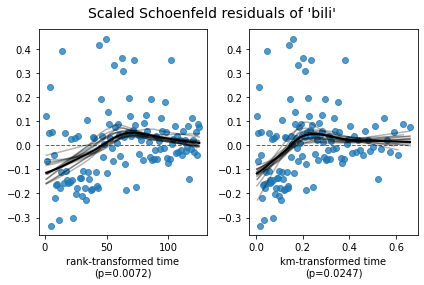

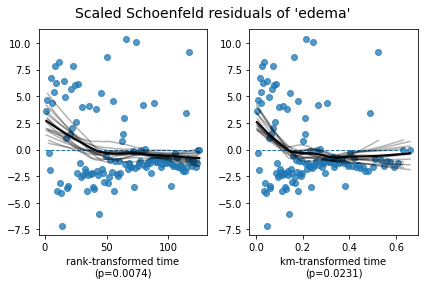

In [11]:
# PH 가정 확인: 숀펠드 잔차 이용
# 유의 수준 0.05 사용. 숀펠드 잔차와 (평활된) 패턴을 보여주는 plot 생성
cox_trt2.check_assumptions(pbc, p_value_threshold=0.05, show_plots=True)

In [12]:
## PBC 자료: 콕스 PH 모형을 적합
## treat, sex, age, bili 효과를 고려함
## PH 가정 위배되는 edema를 층화 변수로 지정

cox_trt2str = CoxPHFitter()  ## 콕스 PH 모형 적합 결과를 cox_trt2str에 저장하도록 지정

## strata: 층화변수인 edema를 지정
cox_trt2str.fit(pbc, duration_col="futime", event_col="delta", 
                formula="treat+sex+age+bili", strata=["edema"])
cox_trt2str.print_summary(3)  ## 결과 출력

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'futime'
                event col = 'delta'
                   strata = ['edema']
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -490.278
         time fit was run = 2021-02-28 00:37:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        0.038      1.038      0.009            0.019            0.056                1.019                1.058
bili       0.130      1.139      0.016            0.099            0.162                1.104                1.175
sex       -0.481      0.618      0.246           -0.964            0.002                0.381                1.002
treat     -0.092      0.912      0.191           -0.467            0.283                0.627                1.328

               z       p   -log2(p)
covariate                          
age        3.980 <0.0005     13.827
bili       8.092 <0.0005     50.594
sex       -1.951   0.051      4.293
treat     -0.480   0.631      0.664
---
Concordance = 0.747
Partial AIC = 988.557
log-likelihood ratio test = 68.723 on 4 df
-log2(p) of ll-ratio test = 44.429

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
         test_name = proportional_hazard_test

---
            test_statistic    p  -log2(p)
age   km              0.08 0.78      0.35
      rank            1.66 0.20      2.34
bili  km              4.42 0.04      4.82
      rank            3.31 0.07      3.86
sex   km              0.00 0.97      0.05
      rank            1.91 0.17      2.58
treat km              0.44 0.51      0.98
      rank            1.95 0.16      2.62



1. Variable 'bili' failed the non-proportional test: p-value is 0.0355.

   Advice 1: the functional form of the variable 'bili' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'bili' using pd.cut, and then specify it in `strata=['bili',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Pr

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0690)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0355)'>]]

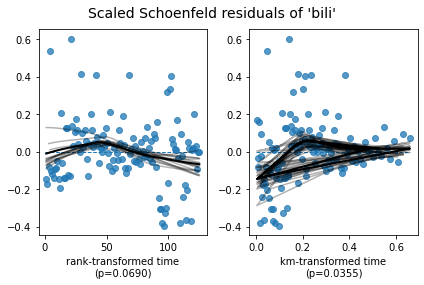

In [97]:
# PH 가정 확인: 숀펠드 잔차 이용
# 유의 수준 0.05 사용. 숀펠드 잔차와 (평활된) 패턴을 보여주는 plot 생성

cox_trt2str.check_assumptions(pbc, p_value_threshold=0.05, show_plots=True)

In [13]:
# bili 변수 (bilirubin)의 자연 로그 변환

pbc['bili_log'] = np.log(pbc['bili'])  ## 로그 변환된 bili 변수 생성  
pbc[['bili','bili_log']].head()  ## bili와 로그 변환된 bili 변수 관측치 5개 출력

,bili,bili_log
0,14.5,2.674149
1,1.1,0.095310
2,1.4,0.336472
3,1.8,0.587787
4,3.4,1.223775


In [14]:
## PBC 자료: 콕스 PH 모형을 적합
## treat, sex, age, log(bili) 효과를 고려함
## PH 가정 위배되는 edema를 층화 변수로 지정

cox_trt2_logstr = CoxPHFitter()  ## 콕스 PH 모형 적합 결과를 cox_trt2_logstr에 저장하도록 지정

## strata: 층화변수인 edema를 지정. 로그 변환된 bili 변수 사용
cox_trt2_logstr.fit(pbc, duration_col="futime", event_col="delta", 
                    formula="treat+sex+age+bili_log", strata=["edema"])
cox_trt2_logstr.print_summary(3)  ## 결과 출력

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'futime'
                event col = 'delta'
                   strata = ['edema']
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -469.369
         time fit was run = 2021-02-28 01:03:32 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        0.038      1.039      0.009            0.020            0.056                1.020                1.058
bili_log   0.948      2.582      0.097            0.758            1.139                2.134                3.124
sex       -0.229      0.795      0.249           -0.717            0.259                0.488                1.295
treat      0.073      1.075      0.192           -0.304            0.449                0.738                1.567

               z       p   -log2(p)
covariate                          
age        4.145 <0.0005     14.844
bili_log   9.753 <0.0005     72.240
sex       -0.921   0.357      1.485
treat      0.378   0.706      0.503
---
Concordance = 0.791
Partial AIC = 946.738
log-likelihood ratio test = 110.542 on 4 df
-log2(p) of ll-ratio test = 73.925

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic    p  -log2(p)
age      km              0.22 0.64      0.64
         rank            0.86 0.35      1.50
bili_log km              0.99 0.32      1.64
         rank            1.67 0.20      2.35
sex      km              0.00 0.97      0.04
         rank            5.10 0.02      5.38
treat    km              0.53 0.47      1.09
         rank            1.76 0.18      2.44



1. Variable 'sex' failed the non-proportional test: p-value is 0.0240.

   Advice: with so few unique values (only 2), you can include `strata=['sex', ...]` in the call in
`.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0240)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.9742)'>]]

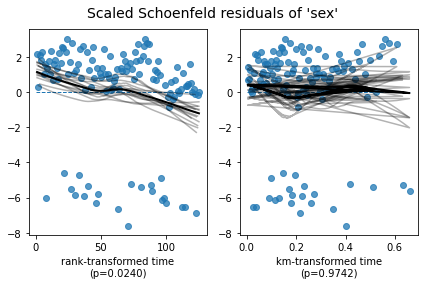

In [15]:
# PH 가정 확인: 숀펠드 잔차 이용
# 유의 수준 0.05 사용. 숀펠드 잔차와 (평활된) 패턴을 보여주는 plot 생성

cox_trt2_logstr.check_assumptions(pbc, p_value_threshold=0.05, show_plots=True)

In [16]:
## PBC 자료: 콕스 PH 모형을 적합
## treat, sex, age, bili 효과를 고려함
## PH 가정 위배되는 edema를 층화 변수로 지정
## bili와 시간(futime)의 교호작용 항 추가

cox_trt2_tdlogstr = CoxPHFitter()  ## 콕스 PH 모형 적합 결과를 cox_trt2_tdstr에 저장하도록 지정

pbc['time_bili'] = pbc['bili'] * pbc['futime']  ## bili와 시간(futime)의 교호작용 항 생성

## strata: 층화변수인 edema를 지정
cox_trt2_tdlogstr.fit(pbc, duration_col="futime", event_col="delta", 
                      formula="treat+sex+age+bili+time_bili", 
                      strata=["edema"])
cox_trt2_tdlogstr.print_summary(5)  ## 결과 출력

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'futime'
                event col = 'delta'
                   strata = ['edema']
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -471.61868
         time fit was run = 2021-02-28 01:06:39 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
age        0.03447    1.03507    0.00999          0.01490          0.05405              1.01501              1.05554
bili       0.28884    1.33488    0.03174          0.22664          0.35105              1.25438              1.42056
sex       -0.68056    0.50633    0.25126         -1.17303         -0.18809              0.30943              0.82854
time_bili -0.00017    0.99983    0.00003         -0.00023         -0.00011              0.99977              0.99989
treat     -0.24591    0.78199    0.19625         -0.63055          0.13873              0.53230              1.14882

                 z       p   -log2(p)
covariate                            
age        3.45181 0.00056   10.81043
bili       9.10098  <5e-06   63.27635
sex       -2.70855 0.00676    7.20924
time_bili -5.37111  <5e-06   23.60730
treat     -1.25305 0.21019    2.25024
---
Concordance = 0.80500
Partial AIC = 953.23737
log-likelihood ratio test = 106.04263 on 5 df
-log2(p) of ll-ratio test = 68.27093

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic      p  -log2(p)
age       km              0.59   0.44      1.18
          rank            2.02   0.16      2.69
bili      km              3.35   0.07      3.90
          rank            1.97   0.16      2.64
sex       km              0.70   0.40      1.31
          rank            1.16   0.28      1.83
time_bili km             22.30 <0.005     18.71
          rank            0.75   0.39      1.37
treat     km              0.07   0.79      0.34
          rank            0.75   0.39      1.38



1. Variable 'time_bili' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'time_bili' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'time_bili' using pd.cut, and then specify it in
`strata=['time_bili', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.3880)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0000)'>]]

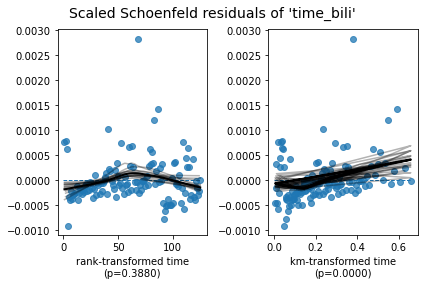

In [17]:
# PH 가정 확인: 숀펠드 잔차 이용
# 유의 수준 0.05 사용. 숀펠드 잔차와 (평활된) 패턴을 보여주는 plot 생성

cox_trt2_tdlogstr.check_assumptions(pbc, p_value_threshold=0.05, show_plots=True)

In [106]:
## Standford Heart Transplant 자료 불러들이기
## Long 버전: 계수 과정 표현

heart_long = pd.read_csv("stanford_long.csv")  
heart_long.head(10)  ## 처음 10개 관측치 출력

,start,stop,event,age,year,surgery,transplant,id
0,0.0,50.0,1,-17.155373,0.123203,0,0,1
1,0.0,6.0,1,3.835729,0.254620,0,0,2
2,0.0,1.0,0,6.297057,0.265572,0,0,3
3,1.0,16.0,1,6.297057,0.265572,0,1,3
4,0.0,36.0,0,-7.737166,0.490075,0,0,4
5,36.0,39.0,1,-7.737166,0.490075,0,1,4
6,0.0,18.0,1,-27.214237,0.607803,0,0,5
7,0.0,3.0,1,6.595483,0.700890,0,0,6
8,0.0,51.0,0,2.869268,0.780287,0,0,7
9,51.0,675.0,1,2.869268,0.780287,0,1,7


In [107]:
## Stanford 자료: 시간 의존형 콕스 PH 모형을 적합
## transplant 효과를 고려함
## 자료가 계수 과정으로 표현
## lifelines 패키지에 있는 CoxTimeVaryingFitter 함수 사용

cox_heart_long = CoxTimeVaryingFitter()  ## 콕스 PH 모형 적합 결과를 cox_trt2_tdstr에 저장하도록 지정

cox_heart_long.fit(heart_long,
        id_col='id',           ## 개체 지표 지정
        event_col='event',
        start_col='start',     ## 시간의 시작점 변수 지정
        stop_col='stop',       ## 시간의 끝점 변수 지정
        formula="transplant")

cox_heart_long.print_summary(3, model="transplant: time-dependent")  ## 결과 출력

<lifelines.CoxTimeVaryingFitter: fitted with 172 periods, 103 subjects, 75 events>
         event col = 'event'
number of subjects = 103
 number of periods = 172
  number of events = 75
partial log-likelihood = -298.031
  time fit was run = 2021-02-26 23:37:20 UTC
             model = transplant: time-dependent

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
transplant  0.127      1.136      0.301           -0.463            0.717                0.629                2.049

               z     p   -log2(p)
covariate                        
transplant 0.422 0.673      0.572
---
Partial AIC = 598.063
log-likelihood ratio test = 0.180 on 1 df
-log2(p) of ll-ratio test = 0.574

In [108]:
## Standford Heart Transplant 자료 불러들이기
## 한 줄 당 한 명에 대한 관측치
heart = pd.read_csv("stanford.csv")
heart.head()  ## 처음 5개 관측치 출력

,id,year,age,delta,survtime,surgery,transplant,waittime,match1,match2,match3
0,15,68,53,1,1,0,0,NaN,NaN,NaN,NaN
1,43,70,43,1,2,0,0,NaN,NaN,NaN,NaN
2,61,71,52,1,2,0,0,NaN,NaN,NaN,NaN
3,75,72,52,1,2,0,0,NaN,NaN,NaN,NaN
4,6,68,54,1,3,0,0,NaN,NaN,NaN,NaN


In [109]:
## Stanford 자료: PH 모형을 적합
## transplant 효과를 고려함

cox_heart = CoxPHFitter()  ## 콕스 PH 모형 적합 결과를 cox_heart에 저장하도록 지정

cox_heart.fit(heart, duration_col="survtime", event_col="delta", 
              formula="transplant")
cox_heart.print_summary(3)  ## 결과 출력

<lifelines.CoxPHFitter: fitted with 103 total observations, 28 right-censored observations>
             duration col = 'survtime'
                event col = 'delta'
      baseline estimation = breslow
   number of observations = 103
number of events observed = 75
   partial log-likelihood = -285.148
         time fit was run = 2021-02-26 23:38:08 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
transplant -1.323      0.266      0.244           -1.801           -0.846                0.165                0.429

                z       p   -log2(p)
covariate                           
transplant -5.428 <0.0005     24.068
---
Concordance = 0.668
Partial AIC = 572.297
log-likelihood ratio test = 25.946 on 1 df
-log2(p) of ll-ratio test = 21.442